# 

# Labelling Stock Relevances

## Imports and Dataset Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override() # bypassing default pandas_datareader with yfinance Y! API implementation

In [172]:
root = ""
tickers = pd.read_csv(root + "data/blog/tickers.csv", usecols=[1]) 
tickers = tickers.loc[:,"0"].tolist()

pictionary = {ticker: pd.read_csv(root + f"data/blog/{ticker}.csv", index_col='date', parse_dates=True)['close'].pct_change() for ticker in tickers} # to consolidate as a zip?
df = pd.DataFrame(pictionary)

[*********************100%***********************]  1 of 1 completed


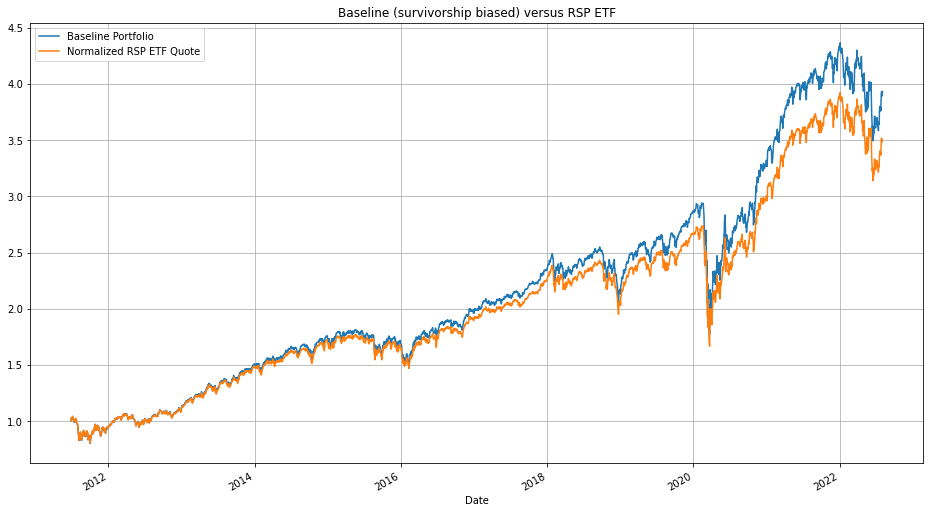

In [3]:
(1+df.mean(axis=1, skipna=True)).cumprod().rename("Baseline Portfolio").plot(legend=True, title="Baseline (survivorship biased) versus RSP ETF", figsize = (16,9))
rsp_etf = pdr.get_data_yahoo("RSP", df.index[0], df.index[-1])["Adj Close"] # with no correction wrt fees
#rsp_etf = rsp_etf["2018-04-01":]
rsp_etf /= rsp_etf.iloc[0]
rsp_etf.rename("Normalized RSP ETF Quote").plot(legend=True)
plt.grid();

In [4]:
AAPLdaily_rets = df["AAPL"]
AAPLdaily_rets.head()

date
2011-06-29         NaN
2011-06-30    0.004879
2011-07-01    0.022612
2011-07-05    0.017975
2011-07-06    0.006668
Name: AAPL, dtype: float64

## Resampling Raw Returns

In [173]:
def f(data, last_row=False):
    df = ((1+data).cumprod(axis=0)-1)
    if last_row:
        return df.iloc[-1]
    return df

AAPLdaily_rets.resample("BM").apply(f, last_row=True)[:-1]

date
2011-06-30    0.004879
2011-07-29    0.163286
2011-08-31   -0.007462
2011-09-30   -0.009121
2011-10-31    0.054028
                ...   
2022-03-31    0.054457
2022-04-29   -0.097131
2022-05-31   -0.054496
2022-06-30   -0.081430
2022-07-29    0.188634
Freq: BM, Name: AAPL, Length: 134, dtype: float64

In [174]:
df_monthly_returns = df.resample("BM").apply(f, last_row=True)[1:-1]

In [175]:
df_monthly_returns.head()

,GHC,AZO,CMG,ISRG,SHLDQ,NFLX,GAS,DNB,PCLN,R,...,ESM,WBD,CPT,BALL,ELV,VICI,KDP,ON,VIAB,LLL
date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,-0.034329,-0.031881,0.053181,0.076429,-0.024776,0.012562,0.002211,-0.039629,0.050241,-0.009323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050588,-0.095254
2011-08-31,-0.115685,0.075495,-0.034537,-0.047934,-0.140376,-0.116471,0.026919,-0.072871,-0.000725,-0.158751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003717,-0.137281
2011-09-30,-0.080925,0.039707,-0.033251,-0.044762,-0.039573,-0.518020,-0.016417,-0.084122,-0.163422,-0.203271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.192444,-0.086258
2011-10-31,0.050964,0.013785,0.109490,0.191007,0.359179,-0.275360,0.029455,0.091332,0.129622,0.358038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131905,0.093755
2011-11-30,0.055121,0.014803,-0.043318,0.000807,-0.228319,-0.213816,-0.006160,0.050687,-0.042996,0.039562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020753,-0.015440


In [176]:
df_monthly_returns.tail()

,GHC,AZO,CMG,ISRG,SHLDQ,NFLX,GAS,DNB,PCLN,R,...,ESM,WBD,CPT,BALL,ELV,VICI,KDP,ON,VIAB,LLL
date,,,,,,,,,,,,,,,,,,,,,
2022-03-31,NaN,0.097237,0.038520,0.039093,NaN,-0.050517,NaN,NaN,NaN,NaN,...,0.000512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-29,NaN,-0.043584,-0.079910,-0.206775,NaN,-0.491818,NaN,NaN,NaN,NaN,...,0.003071,-0.010899,-0.032439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-31,NaN,0.053276,-0.036452,-0.048725,NaN,0.037193,NaN,NaN,NaN,NaN,...,-0.001020,0.016529,-0.091789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-30,NaN,0.043440,-0.067941,-0.118301,NaN,-0.114313,NaN,NaN,NaN,NaN,...,NaN,-0.272629,-0.056210,-0.029906,-0.006158,-0.002678,-0.002874,-0.015845,NaN,NaN
2022-07-29,NaN,-0.005458,0.196564,0.146779,NaN,0.286098,NaN,NaN,NaN,NaN,...,NaN,0.117735,0.049227,0.067617,-0.011356,0.147700,0.094660,0.327370,NaN,NaN


A very useful graphical comparison between types of compounding wealth invested depending on sampling frequency

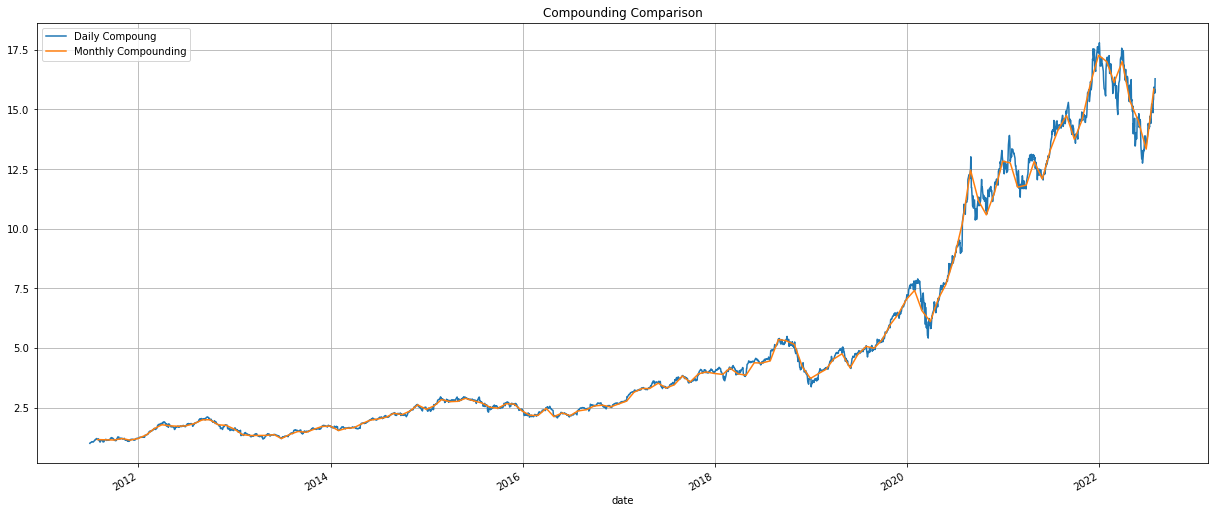

In [177]:
(1+df["AAPL"]).cumprod().rename("Daily Compoung").plot(legend=True)
(1+df_monthly_returns["AAPL"]).cumprod().rename("Monthly Compounding").plot(legend=True, title="Compounding Comparison", figsize=(21,9))
plt.grid();


## Ranking Assets By Monthly Raw Returns Each End Of Month

1) Ranking for each business month end frequency (_BM_). From **LTR** algos perspective, index could be used as a _query_ label:

In [179]:
df_monthly_returns.rank(ascending=False, axis=1)

,GHC,AZO,CMG,ISRG,SHLDQ,NFLX,GAS,DNB,PCLN,R,...,ESM,WBD,CPT,BALL,ELV,VICI,KDP,ON,VIAB,LLL
date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,247.0,236.0,44.0,25.0,213.0,93.0,123.0,266.0,49.0,153.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288.0,403.0
2011-08-31,358.0,8.0,182.0,214.0,399.0,360.0,64.0,273.0,106.0,417.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,393.0
2011-09-30,229.0,20.0,137.0,157.0,149.0,476.0,97.0,238.0,387.0,430.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416.0,246.0
2011-10-31,385.0,440.0,273.0,116.0,11.0,474.0,414.0,310.0,225.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.0,308.0
2011-11-30,62.0,170.0,365.0,212.0,472.0,469.0,244.0,69.0,362.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,278.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,NaN,98.0,226.0,222.0,NaN,413.0,NaN,NaN,NaN,NaN,...,315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-29,NaN,197.0,303.0,482.0,NaN,503.0,NaN,NaN,NaN,NaN,...,103.0,126.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-31,NaN,125.0,386.0,410.0,NaN,172.0,NaN,NaN,NaN,NaN,...,282.0,234.0,460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Some Useful Checks

In [180]:
df_monthly_returns.rank(ascending=False, axis=1).iloc[0].sort_values(ascending=True).head(10) # The Ranking

WPI       1.0
CVC       2.0
EQT       3.0
GOOGL     4.0
RRC       5.0
APOL      6.0
AAPL      7.0
CHK       8.0
URBN      9.0
ETFC     10.0
Name: 2011-07-29 00:00:00, dtype: float64

In [182]:
df_monthly_returns.iloc[0].sort_values(ascending=False).head(10) # Checking the Meaning or Rank

WPI      0.428571
CVC      0.315244
EQT      0.208683
GOOGL    0.192168
RRC      0.174054
APOL     0.163690
AAPL     0.163286
CHK      0.157164
URBN     0.155950
ETFC     0.150725
Name: 2011-07-29 00:00:00, dtype: float64

**Tresholds definition**

In [13]:
""" uppers_th = 10
lowers_th = df_monthly_returns.iloc[0].count()-uppers_th
print(f"({uppers_th}, {lowers_th})") """

' uppers_th = 10\nlowers_th = df_monthly_returns.iloc[0].count()-uppers_th\nprint(f"({uppers_th}, {lowers_th})") '

a) The Worst Performers (First End Of Month):

In [14]:
df_monthly_returns.iloc[0][df_monthly_returns.iloc[0].rank(ascending=True)<=10].rank(ascending=True).sort_values()

EP       1.0
JNPR     2.0
AKAM     3.0
AKS      4.0
S        5.0
IPG      6.0
MWW      7.0
GNW      8.0
FLIR     9.0
AVY     10.0
Name: 2011-07-29 00:00:00, dtype: float64

b) The Best Performers (First End of Month)

In [15]:
df_monthly_returns.iloc[0][df_monthly_returns.iloc[0].rank(ascending=False)<=10].rank(ascending=False).sort_values()

WPI       1.0
CVC       2.0
EQT       3.0
GOOGL     4.0
RRC       5.0
APOL      6.0
AAPL      7.0
CHK       8.0
URBN      9.0
ETFC     10.0
Name: 2011-07-29 00:00:00, dtype: float64

c)  Let's Score Them

In [16]:
df_test = df_monthly_returns.copy()

In [17]:
df_row = df_test.iloc[0]

In [18]:
best_perfs = df_row.rank(ascending=False)<=10
worst_perfs = df_row.rank(ascending=True)<=10

In [19]:
df_row[worst_perfs]

AVY    -0.183278
AKS    -0.229061
MWW    -0.199181
FLIR   -0.185405
AKAM   -0.230378
IPG    -0.215200
GNW    -0.190661
JNPR   -0.257461
EP     -0.300000
S      -0.215213
Name: 2011-07-29 00:00:00, dtype: float64

In [20]:
df_row[best_perfs]

APOL     0.163690
URBN     0.155950
WPI      0.428571
EQT      0.208683
RRC      0.174054
CVC      0.315244
GOOGL    0.192168
ETFC     0.150725
CHK      0.157164
AAPL     0.163286
Name: 2011-07-29 00:00:00, dtype: float64

In [21]:
df_row.loc[best_perfs] = 1 # High Positive Relevance 
df_row.loc[worst_perfs] = -1 # High Negative Relevance
df_row.loc[~best_perfs & ~worst_perfs] = 0 # Irrelevant for Trading
df_row

GHC      0.0
AZO      0.0
CMG      0.0
ISRG     0.0
SHLDQ    0.0
        ... 
VICI     0.0
KDP      0.0
ON       0.0
VIAB     0.0
LLL      0.0
Name: 2011-07-29 00:00:00, Length: 755, dtype: float64

In [22]:
df_row[df_row!=0].count()

20

d) Therefore we are able to construct a minimal viable scorer:

In [ ]:
""" def revelator(data):
    #pass
    # best_perfs = data.rank(ascending=False)<=10
    worst_perfs = data.rank(ascending=True)
    #df.loc[best_perfs] = 1
    #df.loc[worst_perfs] = -1
    #df_row.loc[~best_perfs & ~worst_perfs] = 0
    return df

df_monthly_returns.apply(revelator, axis=1) """

In [183]:
""" def revelator(data):
    #pass
    # best_perfs = data.rank(ascending=False)<=10
    df = data.rank(ascending=False)
    #df.loc[best_perfs] = 1
    #df.loc[worst_perfs] = -1
    #df_row.loc[~best_perfs & ~worst_perfs] = 0
    return df """

df_monthly_ranks = df_monthly_returns.rank(ascending=False, axis=1)

In [185]:
df_monthly_ranks.iloc[0].sort_values().head(10)

WPI       1.0
CVC       2.0
EQT       3.0
GOOGL     4.0
RRC       5.0
APOL      6.0
AAPL      7.0
CHK       8.0
URBN      9.0
ETFC     10.0
Name: 2011-07-29 00:00:00, dtype: float64

In [184]:
df_rank_encoded = df_monthly_ranks.copy()
df_rank_encoded.head(10)

,GHC,AZO,CMG,ISRG,SHLDQ,NFLX,GAS,DNB,PCLN,R,...,ESM,WBD,CPT,BALL,ELV,VICI,KDP,ON,VIAB,LLL
date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,247.0,236.0,44.0,25.0,213.0,93.0,123.0,266.0,49.0,153.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288.0,403.0
2011-08-31,358.0,8.0,182.0,214.0,399.0,360.0,64.0,273.0,106.0,417.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,393.0
2011-09-30,229.0,20.0,137.0,157.0,149.0,476.0,97.0,238.0,387.0,430.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416.0,246.0
2011-10-31,385.0,440.0,273.0,116.0,11.0,474.0,414.0,310.0,225.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.0,308.0
2011-11-30,62.0,170.0,365.0,212.0,472.0,469.0,244.0,69.0,362.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,278.0
2011-12-30,120.0,296.0,104.0,56.0,475.0,38.0,178.0,46.0,360.0,247.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0,256.0
2012-01-31,326.0,189.0,149.0,360.0,3.0,1.0,391.0,114.0,74.0,214.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,208.0
2012-02-29,222.0,120.0,158.0,60.0,1.0,463.0,426.0,345.0,16.0,455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.0,352.0
2012-03-30,430.0,371.0,86.0,116.0,427.0,190.0,390.0,245.0,13.0,374.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.0,318.0


In [188]:
df_monthly_returns.head(5)

,GHC,AZO,CMG,ISRG,SHLDQ,NFLX,GAS,DNB,PCLN,R,...,ESM,WBD,CPT,BALL,ELV,VICI,KDP,ON,VIAB,LLL
date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,-0.034329,-0.031881,0.053181,0.076429,-0.024776,0.012562,0.002211,-0.039629,0.050241,-0.009323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050588,-0.095254
2011-08-31,-0.115685,0.075495,-0.034537,-0.047934,-0.140376,-0.116471,0.026919,-0.072871,-0.000725,-0.158751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003717,-0.137281
2011-09-30,-0.080925,0.039707,-0.033251,-0.044762,-0.039573,-0.518020,-0.016417,-0.084122,-0.163422,-0.203271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.192444,-0.086258
2011-10-31,0.050964,0.013785,0.109490,0.191007,0.359179,-0.275360,0.029455,0.091332,0.129622,0.358038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131905,0.093755
2011-11-30,0.055121,0.014803,-0.043318,0.000807,-0.228319,-0.213816,-0.006160,0.050687,-0.042996,0.039562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020753,-0.015440


In [189]:
df_monthly_ranks.head(5)

,GHC,AZO,CMG,ISRG,SHLDQ,NFLX,GAS,DNB,PCLN,R,...,ESM,WBD,CPT,BALL,ELV,VICI,KDP,ON,VIAB,LLL
date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,247.0,236.0,44.0,25.0,213.0,93.0,123.0,266.0,49.0,153.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288.0,403.0
2011-08-31,358.0,8.0,182.0,214.0,399.0,360.0,64.0,273.0,106.0,417.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,393.0
2011-09-30,229.0,20.0,137.0,157.0,149.0,476.0,97.0,238.0,387.0,430.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416.0,246.0
2011-10-31,385.0,440.0,273.0,116.0,11.0,474.0,414.0,310.0,225.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.0,308.0
2011-11-30,62.0,170.0,365.0,212.0,472.0,469.0,244.0,69.0,362.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,278.0


In [190]:
df_rank_encoded.head(5)

,GHC,AZO,CMG,ISRG,SHLDQ,NFLX,GAS,DNB,PCLN,R,...,ESM,WBD,CPT,BALL,ELV,VICI,KDP,ON,VIAB,LLL
date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,247.0,236.0,44.0,25.0,213.0,93.0,123.0,266.0,49.0,153.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288.0,403.0
2011-08-31,358.0,8.0,182.0,214.0,399.0,360.0,64.0,273.0,106.0,417.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,393.0
2011-09-30,229.0,20.0,137.0,157.0,149.0,476.0,97.0,238.0,387.0,430.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416.0,246.0
2011-10-31,385.0,440.0,273.0,116.0,11.0,474.0,414.0,310.0,225.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.0,308.0
2011-11-30,62.0,170.0,365.0,212.0,472.0,469.0,244.0,69.0,362.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,278.0


In [191]:
def revelator(data): #John, The Revelator
    bins = np.linspace(1,data.count(),num=20) # notna values. This implies trading with a different number of high relevant (1) and high irrelevant (19) stocks
    labels = list(range(1,len(bins))) 
    df = pd.cut(x=data, 
        bins=bins, 
        labels=labels)
    return df

df_rank_encoded = df_rank_encoded.apply(revelator, axis=1)

In [192]:
""" 
Relevance encoding must be lagged : to train the model we have to calculate and select features 
capable to explain the one-period (1 BM) after high or low performance
In this way relevances can be inferred by the model on the test set (prediction) 
and then implement portfolio selection policies prior to the period of interest 
"""
df_rank_encoded = df_rank_encoded.shift(-1).astype(float) 
df_rank_encoded

,GHC,AZO,CMG,ISRG,SHLDQ,NFLX,GAS,DNB,PCLN,R,...,ESM,WBD,CPT,BALL,ELV,VICI,KDP,ON,VIAB,LLL
date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,15.0,1.0,8.0,9.0,16.0,15.0,3.0,11.0,5.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,16.0
2011-08-31,10.0,1.0,6.0,7.0,6.0,19.0,4.0,10.0,16.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,10.0
2011-09-30,16.0,18.0,11.0,5.0,1.0,19.0,17.0,13.0,9.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,13.0
2011-10-31,3.0,7.0,15.0,9.0,19.0,19.0,10.0,3.0,15.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,12.0
2011-11-30,5.0,12.0,5.0,3.0,19.0,2.0,8.0,2.0,15.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,NaN,8.0,12.0,19.0,NaN,19.0,NaN,NaN,NaN,NaN,...,4.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-29,NaN,5.0,15.0,16.0,NaN,7.0,NaN,NaN,NaN,NaN,...,11.0,9.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-31,NaN,1.0,8.0,13.0,NaN,13.0,NaN,NaN,NaN,NaN,...,NaN,19.0,7.0,4.0,3.0,3.0,3.0,4.0,NaN,NaN


In [114]:
df_rank_encoded.to_csv("data/monthly_ranks_encoded.csv", na_rep="#N/A", index=True, index_label="Date")

#### Signalling By Category: Long Only Category-based PFolios

In [249]:
# Several masks for trading just a category of performers (equally weighted scheme)
mask9 = df_rank_encoded.shift(1)==9
mask10 = df_rank_encoded.shift(1)==10
mask12 = df_rank_encoded.shift(1)==12

In [275]:
# Assets Composing The First Period of Training Period
print(df_rank_encoded.shift(1).iloc[1][df_rank_encoded.shift(1).iloc[1]==9].index.tolist())

['ISRG', 'FLS', 'ICE', 'LXK', 'IFF', 'PDCO', 'J', 'HRL', 'SWK', 'TDC', 'FLR', 'DOV', 'ZBH', 'EXPD', 'NRG', 'PX', 'PAYX', 'CAG', 'THC', 'ALL', 'KR', 'BA', 'EMR', 'EBAY', 'GLW']


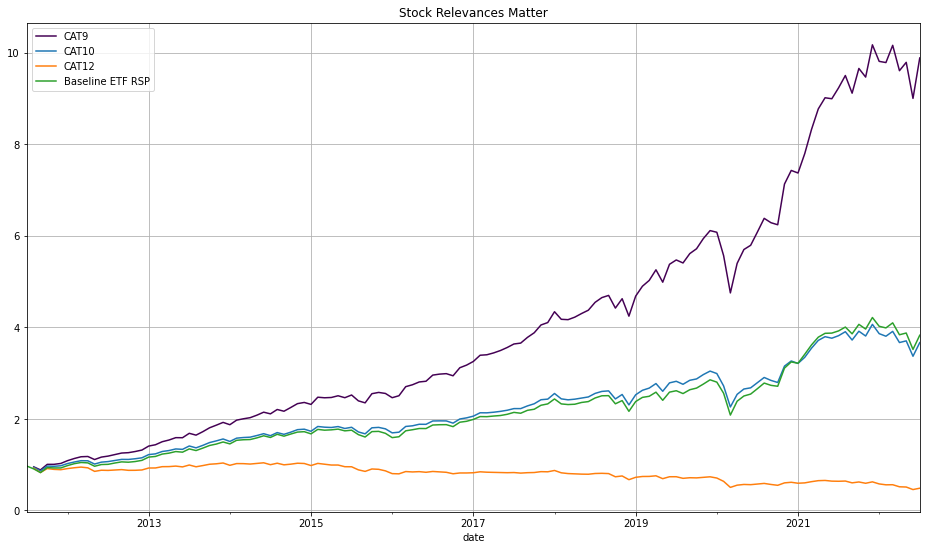

In [262]:
# Equity Line for Equally Weighted Portfolios composed by different class peformers (CAT 9, 10, 12)
(1+df_monthly_returns[mask9].mean(axis=1, skipna=True)).rename("CAT9").cumprod().plot(figsize=(16,9), title="Stock Relevances Matter", legend=True, cmap="viridis")
(1+df_monthly_returns[mask10].mean(axis=1, skipna=True)).rename("CAT10").cumprod().plot(legend=True)
(1+df_monthly_returns[mask12].mean(axis=1, skipna=True)).rename("CAT12").cumprod().plot(legend=True)
# Baseline ETF biased Replica (0.2% fee p.a.)
(1+df_monthly_returns.mean(axis=1,skipna=True)+0.002/12).rename("Baseline ETF RSP").cumprod().plot(legend=True)
plt.grid();
